In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from invisible_cities.io.dst_io               import load_dst, load_dsts
from invisible_cities.core.core_functions     import in_range

In [2]:
run_number = 8087 # 0 or negative for MC
input_folder       = '/Users/taylorcontreras/Development/Research/nz_studies/data/trigger1/8087/'
input_dst_file     = '*.h5'
input_dsts         = glob.glob(input_folder + input_dst_file)

In [3]:
dst = load_dsts(input_dsts, 'DST', 'Events')
dst = dst.sort_values(by=['time'])
dst = dst[in_range(dst.R, 0, 200)]

In [4]:
dst

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
335,1,1.594373e+09,0,0,1,1,200.0,1.007478,5.756931,783700.0,...,21,17.738438,17.738438,0.580566,-171.434799,54.477261,179.882357,2.833912,9.302721,8.737578
336,2,1.594373e+09,0,0,1,1,225.0,2.770331,11.714249,698350.0,...,21,104.123566,104.123566,1.092191,-90.027995,102.948163,136.760243,2.289342,13.717057,8.692530
337,3,1.594373e+09,0,0,1,1,125.0,2.029927,7.068951,489075.0,...,21,313.428955,313.428955,1.901445,151.684819,67.979036,166.221039,0.421323,9.679086,9.563363
338,4,1.594373e+09,0,0,2,1,275.0,1.843737,9.958330,241725.0,...,20,561.769104,561.769104,2.392768,23.926956,140.669777,142.690173,1.402316,9.863980,9.402714
339,4,1.594373e+09,1,0,2,1,125.0,1.637143,5.706056,737300.0,...,20,66.194069,66.194069,2.392768,23.926956,140.669777,142.690173,1.402316,9.863980,9.402714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,931,1.594373e+09,0,0,1,1,300.0,1.342447,10.028561,449975.0,...,20,352.528076,352.528076,1.927268,48.275823,45.712774,66.484681,0.758135,9.327965,22.507462
971,932,1.594373e+09,0,0,1,1,175.0,2.024436,9.322896,474750.0,...,19,328.749146,328.749146,1.840473,-120.183885,109.303581,162.454421,2.403570,9.571389,8.591657
972,933,1.594373e+09,0,0,1,1,125.0,2.793600,10.463752,304300.0,...,17,500.181091,500.181091,2.262544,-116.764953,73.538357,137.992552,2.579550,9.666618,9.819195
973,934,1.594373e+09,0,0,1,1,175.0,2.437902,11.633262,592250.0,...,17,211.253006,211.253006,1.663729,-36.960561,126.401101,131.694045,1.855273,8.063746,8.834935


Text(0.5, 0, 'Nsipms')

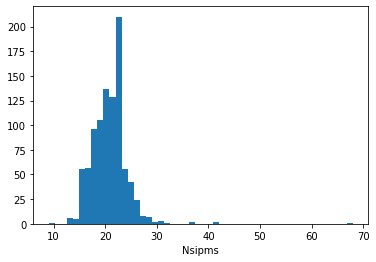

In [5]:
plt.hist(dst.Nsipm, bins=50)
plt.xlabel('Nsipms')

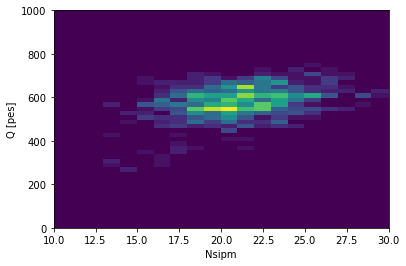

In [10]:
plt.hist2d(dst.Nsipm, dst.S2q, bins=(20,50), range=[[10,30],[0,1000]])
plt.xlabel('Nsipm')
plt.ylabel('Q [pes]')
plt.show()

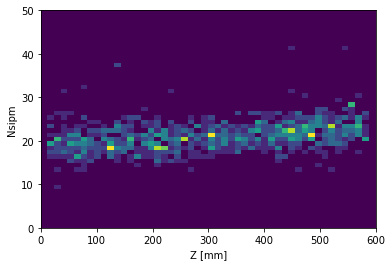

In [7]:
plt.hist2d(dst.Z, dst.Nsipm, bins=(50,50), range=[[0,600],[0,50]])
plt.xlabel('Z [mm]')
plt.ylabel('Nsipm')
plt.show()

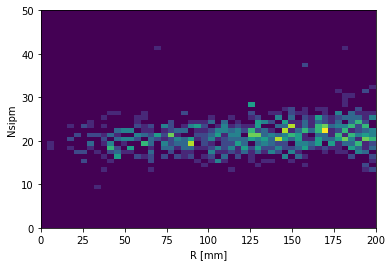

In [8]:
plt.hist2d(dst.R, dst.Nsipm, bins=(50,50), range=[[0,200],[0,50]])
plt.xlabel('R [mm]')
plt.ylabel('Nsipm')
plt.show()

In [11]:
from scipy import stats

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dst.Nsipm, dst.S2q)

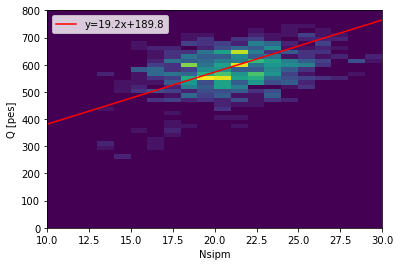

In [29]:
nsipm_range = np.array([10,30])
plt.hist2d(dst.Nsipm, dst.S2q, bins=(20,50), range=[nsipm_range,[0,800]])
plt.plot(nsipm_range, intercept + slope*nsipm_range, 'r', label="y={0:.1f}x+{1:.1f}".format(slope,intercept))
plt.xlabel('Nsipm')
plt.ylabel('Q [pes]')
plt.legend()
plt.show()

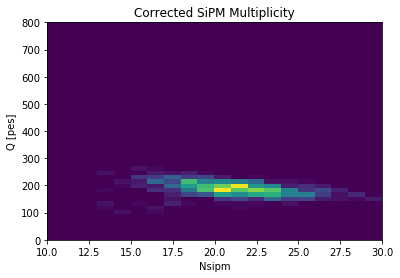

In [28]:
# Corrected
plt.hist2d(dst.Nsipm, dst.S2q/(1 + (slope/intercept)*dst.Nsipm), bins=(20,50), range=[nsipm_range,[0,800]])
plt.xlabel('Nsipm')
plt.ylabel('Q [pes]')
plt.title('Corrected SiPM Multiplicity')
plt.show()

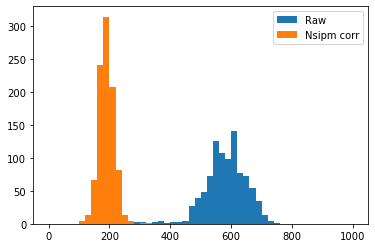

In [33]:
q_range = (0,1000)
bins = 50
plt.hist(dst.S2q, bins=bins, range=q_range, label='Raw')
plt.hist(dst.S2q/(1 + (slope/intercept)*dst.Nsipm), label='Nsipm corr', bins=bins, range=q_range)
plt.legend()
plt.show()